In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
df = pd.read_csv("Kc_house_data.csv")

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [18]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [19]:
df.isna().sum() # check missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

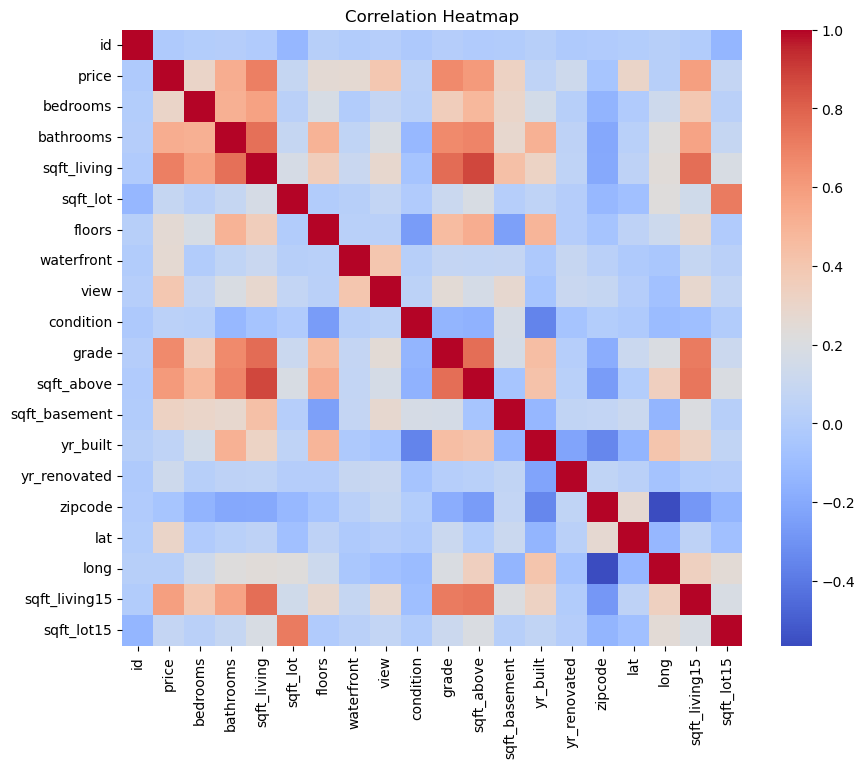

In [20]:
# EDA
# correlation with price
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=["number"]).corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

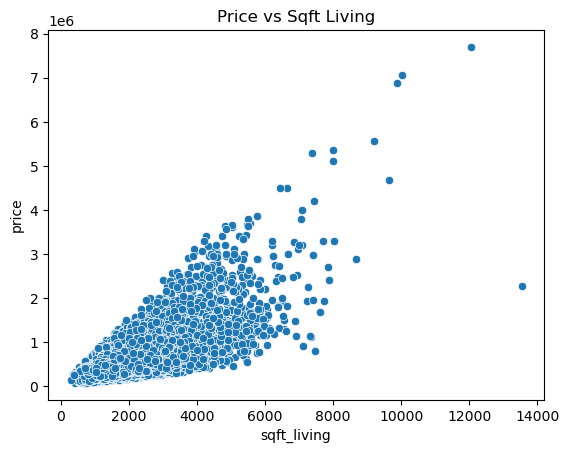

Text(0.5, 1.0, 'Price vs Bedrooms')

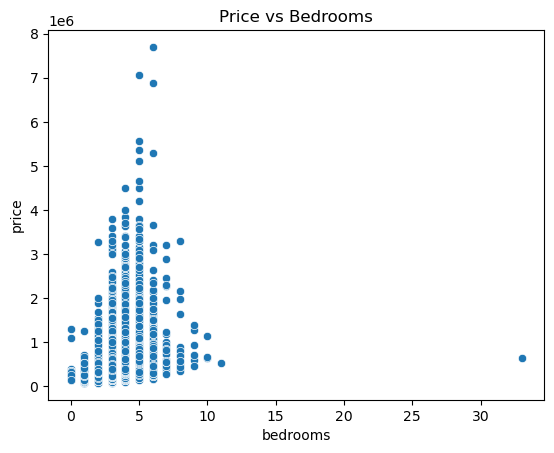

In [21]:
# scatter plots for a few features
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title("Price vs Sqft Living")
plt.show()

sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title("Price vs Bedrooms")

In [22]:
feature_cols = ['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'sqft_living15']
x = df[feature_cols]
y = df['price']
x_scaled = x

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

x_train.shape, x_test.shape


((17290, 7), (4323, 7))

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Model coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

coeff_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": lin_reg.coef_
})
coeff_df


Intercept: -512669.5601443867
Coefficients: [ 2.67303299e+02 -3.95985201e+04 -1.74873889e+04 -7.95895352e+03
  1.01953203e+05 -7.95084247e+01  2.01790337e+01]


,feature,coefficient
0,sqft_living,267.303299
1,bedrooms,-39598.520125
2,bathrooms,-17487.388895
3,floors,-7958.953522
4,grade,101953.203108
5,sqft_above,-79.508425
6,sqft_living15,20.179034


In [25]:
# Predictions
y_train_pred = lin_reg.predict(x_train)
y_test_pred = lin_reg.predict(x_test)

# Evaluation metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Train MAE:", mae_train)
print("Train RMSE:", rmse_train)
print("Train R2:", r2_train)

print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)
print("Test R2:", r2_test)


Train MAE: 158844.54177510875
Train RMSE: 242612.23342063455
Train R2: 0.5494732464829547
Test MAE: 163527.96308375083
Test RMSE: 259363.1422347115
Test R2: 0.555029087842779


## conclussion:
The goal of this project was to build and evaluate a Linear Regression model to predict house prices as part of the Ejaztech.AI Phase 2 supervised learning tasks. I followed a complete workflow: loading the dataset, exploring and cleaning the data, selecting relevant features, splitting into train and test sets, fitting the Linear Regression model, and evaluating it using MAE, RMSE, and R².

The model achieved reasonable predictive performance, showing that a simple Linear Regression can capture important relationships between features such as living area, number of bedrooms/bathrooms, and house prices. By interpreting the coefficients and error metrics, I gained intuition about which factors most strongly influence price and how accurate the model is likely to be in practice.

This project improved my understanding of regression techniques, model evaluation, and result interpretation for real‑world data. Future improvements could include experimenting with polynomial or regularized regression models, adding or transforming features, and performing more systematic hyperparameter tuning to reduce error and improve generalization.
